In [21]:
import random
import math
from matplotlib import pyplot as plt
from collections import Counter

In [2]:
def random_kid():
    return random.choice(["boy", "girl"])

In [6]:
both_girls = 0
older_girl = 0
either_girl = 0

In [7]:
random.seed(0)
for _ in range(1000):
    younger = random_kid()
    older = random_kid()
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1


In [8]:
print("P(both | older):", both_girls/older_girl)
print("P(both | either):", both_girls/either_girl)

P(both | older): 0.4949290060851927
P(both | either): 0.32232496697490093


In [11]:
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

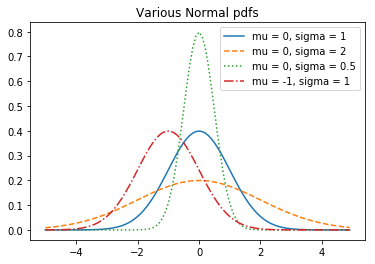

In [13]:
xs = [x / 10.0 for x in range(-50,50)]
plt.plot(xs,[normal_pdf(x, sigma = 1) for x in xs], '-', label='mu = 0, sigma = 1')
plt.plot(xs,[normal_pdf(x, sigma = 2) for x in xs], '--', label='mu = 0, sigma = 2')
plt.plot(xs,[normal_pdf(x, sigma = 0.5) for x in xs], ':', label='mu = 0, sigma = 0.5')
plt.plot(xs,[normal_pdf(x, mu = -1) for x in xs], '-.', label='mu = -1, sigma = 1')
plt.legend()
plt.title('Various Normal pdfs')
plt.show()

In [14]:
def normal_cdf(x, mu=0, sigma=1):
    return(1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

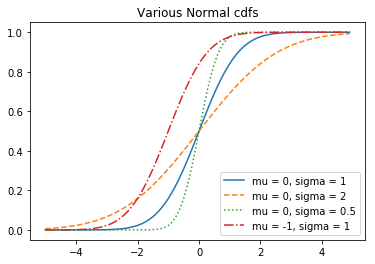

In [15]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_cdf(x, sigma = 1) for x in xs], '-', label='mu = 0, sigma = 1')
plt.plot(xs,[normal_cdf(x, sigma = 2) for x in xs], '--', label='mu = 0, sigma = 2')
plt.plot(xs,[normal_cdf(x, sigma = 0.5) for x in xs], ':', label='mu = 0, sigma = 0.5')
plt.plot(xs,[normal_cdf(x, mu = -1) for x in xs], '-.', label='mu = -1, sigma = 1')
plt.legend(loc=4) #bottom right
plt.title('Various Normal cdfs')
plt.show()

In [17]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """find approximate inverse using binary search"""
    
    # if not standard, compute standard and rescale
    if mu != 0 or sigma !=1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z = -10.0 #normal_cdf(-10) is very close to 0
    hi_z = 10.0 #normal_csf(10) is very close to 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2 # consider the midpoint
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            # midpoint is still too low, search above it
            low_z = mid_z
        elif mid_p > p:
            # midpoint is still too high, search below it
            hi_z = mid_z
        else:
            break
    return mid_z

In [18]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0
def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

In [19]:
def make_hist(p, n, num_points):
    data = [binomial(n, p) for _ in range(num_points)]
    
    # use a bar chart to show the actual hinomial samples
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
           [v / num_points for v in histogram.values()],
           0.80,
           color='0.75')
    
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    
    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
         for i in xs]
    plt.plot(xs, ys)
    plt.title("Binomial Distribution vs. Normal Appromimation")
    plt.show()

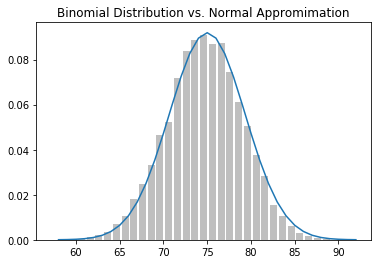

In [22]:
make_hist(0.75, 100, 10000)